In [1]:
!wget https://raw.githubusercontent.com/alexjolly28/entri_DSML/main/resources/insurance.csv

--2024-04-13 07:53:10--  https://raw.githubusercontent.com/alexjolly28/entri_DSML/main/resources/insurance.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 55628 (54K) [text/plain]
Saving to: ‘insurance.csv’

insurance.csv       100%[===================>]  54.32K  --.-KB/s    in 0.01s   

2024-04-13 07:53:10 (5.06 MB/s) - ‘insurance.csv’ saved [55628/55628]



Import all  directories

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Reading the data

In [35]:
data = pd.read_csv("insurance.csv")
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Shape of the data

In [5]:
print(data.shape)

(1338, 7)


In [6]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Description of the data

In [9]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [10]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [12]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [15]:
female=np.mean(data[data['sex']=='female']['charges'])
female

12569.578843835347

In [17]:
male=np.mean(data[data['sex']=='male']['charges'])
male

13956.751177721893

Visuilization

<Axes: xlabel='age', ylabel='charges'>

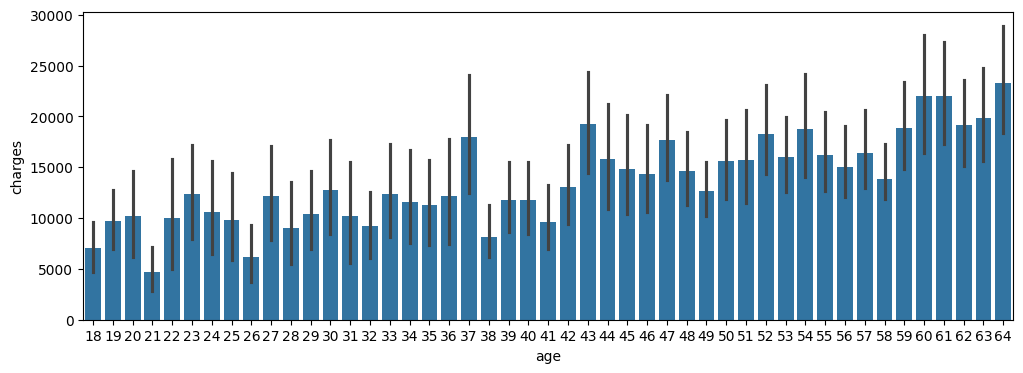

In [19]:
plt.figure(figsize=(12,4))
sns.barplot(x='age',y='charges',data=data)

<Axes: xlabel='sex', ylabel='charges'>

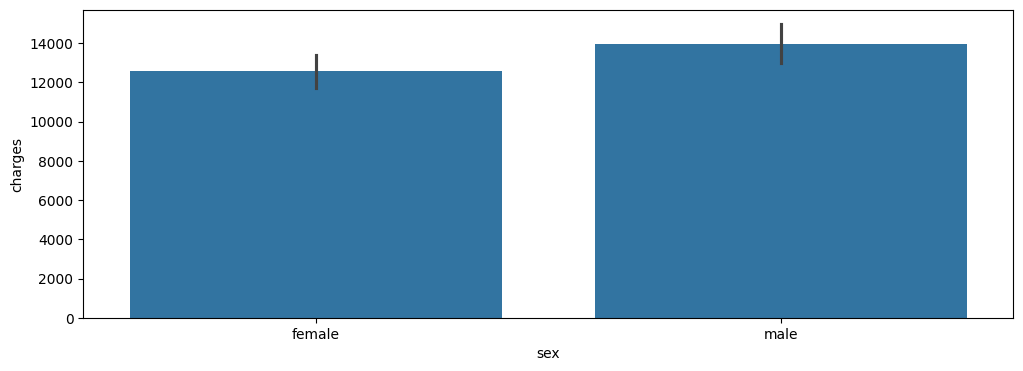

In [20]:
plt.figure(figsize=(12,4))
sns.barplot(x='sex',y='charges',data=data)

<Axes: xlabel='smoker', ylabel='charges'>

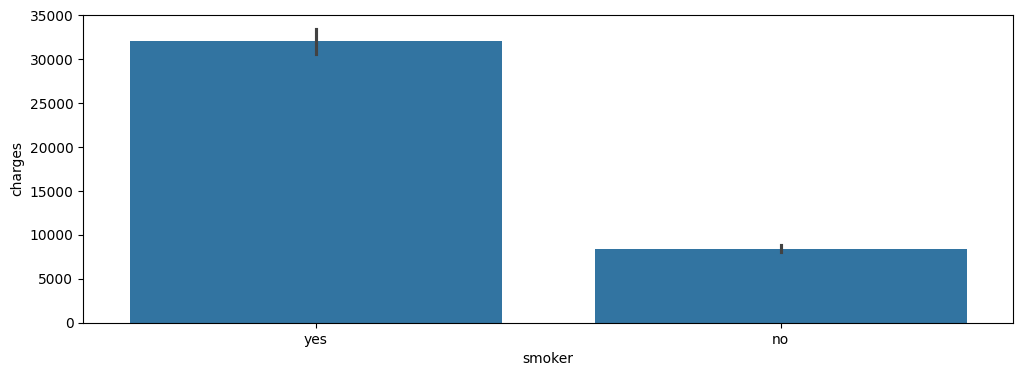

In [22]:
plt.figure(figsize=(12,4))
sns.barplot(x='smoker',y='charges',data=data)

<Axes: xlabel='region', ylabel='charges'>

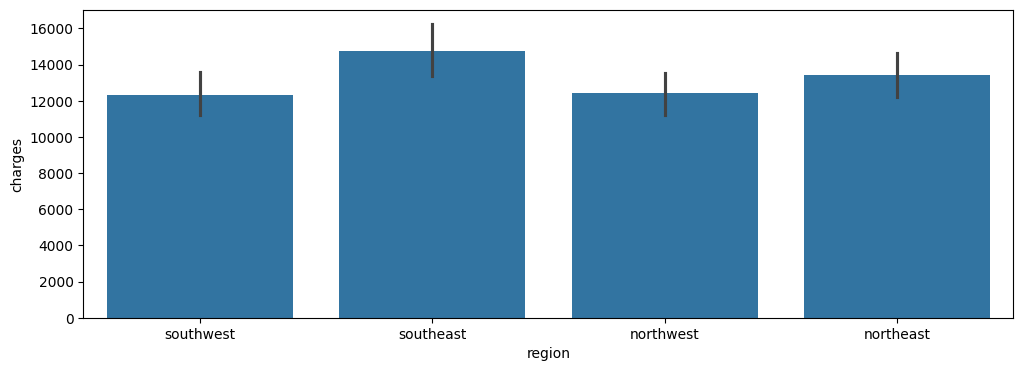

In [23]:
plt.figure(figsize=(12,4))
sns.barplot(x='region',y='charges',data=data)

In [39]:
data['sex']=data['sex'].replace({'male':1, 'female':0})
data['smoker']=data['smoker'].replace({'yes':1, 'no':0})

In [40]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830
1334,18,0,31.920,0,0,northeast,2205.98080
1335,18,0,36.850,0,0,southeast,1629.83350
1336,21,0,25.800,0,0,southwest,2007.94500


Dropping the unnesscary data

region is not nesscary data

In [47]:
data.drop(['region'],axis=1,inplace=True)
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges'], dtype='object')

Correlation of the data

<Axes: >

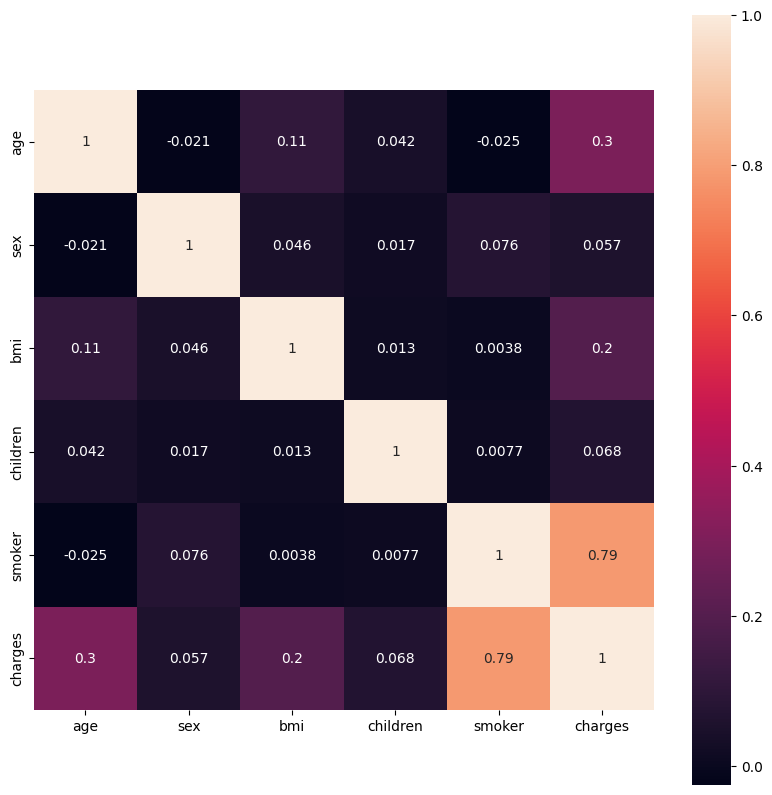

In [51]:
f, ax = plt.subplots(figsize = (10, 10))

corr = data.corr()
sns.heatmap(corr,annot=True,square = True, ax = ax)

Label encoding

Label encoding for sex and smoker

In [52]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['sex'] = le.fit_transform(data['sex'])
data['smoker'] = le.fit_transform(data['smoker'])

In [54]:
data['sex'].value_counts()

sex
1    676
0    662
Name: count, dtype: int64

In [55]:
data['smoker'].value_counts()

smoker
0    1064
1     274
Name: count, dtype: int64

In [57]:
data

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830
1334,18,0,31.920,0,0,2205.98080
1335,18,0,36.850,0,0,1629.83350
1336,21,0,25.800,0,0,2007.94500


In [61]:
X = data.iloc[:,:5]
y = data.iloc[:,5]
print(X)
print(y)

      age  sex     bmi  children  smoker
0      19    0  27.900         0       1
1      18    1  33.770         1       0
2      28    1  33.000         3       0
3      33    1  22.705         0       0
4      32    1  28.880         0       0
...   ...  ...     ...       ...     ...
1333   50    1  30.970         3       0
1334   18    0  31.920         0       0
1335   18    0  36.850         0       0
1336   21    0  25.800         0       0
1337   61    0  29.070         0       1

[1338 rows x 5 columns]
0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


Splitting the data for training and testing

In [89]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [90]:
X_train

,age,sex,bmi,children,smoker
560,46,0,19.950,2,0
1285,47,0,24.320,0,0
1142,52,0,24.860,0,0
969,39,0,34.320,5,0
486,54,0,21.470,3,0
...,...,...,...,...,...
1095,18,0,31.350,4,0
1130,39,0,23.870,5,0
1294,58,1,25.175,0,0
860,37,0,47.600,2,1


In [91]:
X_test

,age,sex,bmi,children,smoker
764,45,0,25.175,2,0
887,36,0,30.020,0,0
890,64,0,26.885,0,1
1293,46,1,25.745,3,0
259,19,1,31.920,0,1
...,...,...,...,...,...
109,63,1,35.090,0,1
575,58,0,27.170,0,0
535,38,1,28.025,1,0
543,54,0,47.410,0,1


In [92]:
y_train

560      9193.83850
1285     8534.67180
1142    27117.99378
969      8596.82780
486     12475.35130
           ...     
1095     4561.18850
1130     8582.30230
1294    11931.12525
860     46113.51100
1126    10214.63600
Name: charges, Length: 1070, dtype: float64

In [93]:
y_test

764      9095.06825
887      5272.17580
890     29330.98315
1293     9301.89355
259     33750.29180
           ...     
109     47055.53210
575     12222.89830
535      6067.12675
543     63770.42801
846      9872.70100
Name: charges, Length: 268, dtype: float64

Linear Regression

In [94]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [95]:
y_pred = regressor.predict(X_test)
y_pred_train = regressor.predict(X_train)

In [96]:
y_pred

array([ 8554.81711589,  6973.58746745, 36798.60416104,  9417.88282303,
       26871.68031081, 11097.38383938,   145.27608963, 16746.1683771 ,
         747.53414191, 11153.67590722, 28518.15016561,  9292.18345421,
        5460.51975119, 38510.48013003, 40359.30938604, 37223.40538064,
       15316.56711945, 36047.50032223,  9326.29049907, 31400.1559532 ,
        4269.64414373, 10464.66374097,  2719.9260555 ,  6579.53742551,
       11232.00255515, 12472.06793446, 14807.11281089,  6066.19283362,
        9535.69029723,  2377.6983797 ,  9475.05690885, 12963.23366722,
        4706.09057393,  3414.674504  ,  4815.64981654, 12484.17176954,
        2359.13614479,  9161.02061228, 33238.67621442, 32743.41702445,
        4274.58967205,  4229.5442107 , 14435.36485176, 11384.66898976,
        8925.70468583, 12480.09178788,  5154.45787816,  3554.10047649,
       35649.60942684,  9276.25523701, 15971.35991397,  2552.75200479,
       12162.99980138,  1062.65132285, 13551.43771934, 12103.65505529,
      

In [97]:
y_pred_train

array([ 7100.52346994,  7934.40502535,  9396.61793405, ...,
       11034.25297612, 37497.10777345, 11810.64194074])

In [98]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_pred)
mse

33979257.05080821

In [99]:
rsme = np.sqrt(mse)
rsme

5829.17293025419

In [100]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
r2

0.7811302113434095

Standard Scaler

In [102]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

In [104]:
from sklearn.svm import SVR
model = SVR()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [105]:
mse = mean_squared_error(y_test,y_pred)
mse

165637998.98220563

In [106]:
rmse = np.sqrt(mse)
rmse

12870.042695430564

In [108]:
r2 = r2_score(y_test,y_pred)
r2

-0.066920144149343

Decision Tree

In [110]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [111]:
mse = mean_squared_error(y_test,y_pred)
mse

38404323.32700315

In [112]:
rmse = np.sqrt(mse)
rmse

6197.122181061396

In [113]:
r2 = r2_score(y_test,y_pred)
r2

0.7526271360932945

Random Forest

In [115]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=40,max_depth=4,n_jobs=-1)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [116]:
mse = mean_squared_error(y_test,y_pred)
mse

19551221.182501134

In [117]:
rmse = np.sqrt(mse)
rmse

4421.676286489224

In [118]:
r2 = r2_score(y_test,y_pred)
r2

0.8740651791828835